# Data interpretation of Covid19 across various countries

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

In [3]:
df1 = pd.read_csv(r'D:\My Creations\New folder\covid_19_data.csv')
df2 = pd.read_csv(r'D:\My Creations\New folder\population_by_country_2020.csv')

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205951 entries, 0 to 205950
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              205951 non-null  int64  
 1   ObservationDate  205951 non-null  object 
 2   Province/State   150574 non-null  object 
 3   Country/Region   205951 non-null  object 
 4   Last Update      205951 non-null  object 
 5   Confirmed        205951 non-null  float64
 6   Deaths           205951 non-null  float64
 7   Recovered        205951 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 12.6+ MB


In [5]:
df1.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [6]:
df1.describe()

,SNo,Confirmed,Deaths,Recovered
count,205951.000000,2.059510e+05,205951.000000,2.059510e+05
mean,102976.000000,4.540148e+04,1262.633850,2.766348e+04
std,59453.076982,1.437216e+05,4082.838603,1.334517e+05
min,1.000000,-3.028440e+05,-178.000000,-8.544050e+05
25%,51488.500000,5.960000e+02,7.000000,1.100000e+01
50%,102976.000000,5.361000e+03,101.000000,1.028000e+03
75%,154463.500000,2.618400e+04,713.000000,9.880000e+03
max,205951.000000,3.049037e+06,80143.000000,6.399531e+06


In [7]:
df1.shape

(205951, 8)

# Handling null values 

In [8]:
df1.isnull().sum() # finding the number of null values 

SNo                    0
ObservationDate        0
Province/State     55377
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In this case the null values are present only in the Province/State column.

In [9]:
data=df1.dropna()

In [10]:
data.shape

(150574, 8)

In [11]:
data.isnull().sum()

SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

AFter cleaning the data their is no null values in the dataset.

# Sorting data

In [12]:
data.sort_values('Country/Region',ascending=False)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
136798,136799,10/20/2020,Lviv Oblast,Ukraine,2020-10-21 04:24:14,25392.0,717.0,9671.0
185323,185324,12/23/2020,Ternopil Oblast,Ukraine,2020-12-24 05:23:04,32738.0,444.0,28701.0
137664,137665,10/21/2020,Poltava Oblast,Ukraine,2020-10-22 04:24:27,6880.0,132.0,2260.0
122623,122624,10/01/2020,Kirovohrad Oblast,Ukraine,2020-10-02 04:23:51,1127.0,57.0,877.0
153028,153029,11/11/2020,Chernivtsi Oblast,Ukraine,2020-11-12 05:25:55,26301.0,520.0,11653.0
...,...,...,...,...,...,...,...,...
14518,14519,04/12/2020,Western Australia,Australia,2020-04-12 23:25:00,514.0,6.0,216.0
129485,129486,10/10/2020,Queensland,Australia,2020-10-11 04:23:46,1161.0,6.0,1152.0
33884,33885,06/02/2020,Tasmania,Australia,2020-06-03 02:33:13,228.0,13.0,208.0
184867,184868,12/23/2020,Australian Capital Territory,Australia,2020-12-24 05:23:04,118.0,3.0,114.0


# Table of cases countrywise

In [13]:
d=data.groupby('Country/Region',as_index=False).sum()
d

,Country/Region,SNo,Confirmed,Deaths,Recovered
0,Australia,233060514,5.634465e+06,150217.0,4.755974e+06
1,Austria,2345,2.000000e+00,0.0,0.000000e+00
2,Belgium,148864960,4.217720e+07,1239451.0,0.000000e+00
3,Brazil,755495508,1.040627e+09,30644921.0,8.898000e+08
4,Canada,446395159,6.082935e+07,2681976.0,4.875893e+07
5,Chile,475108993,1.030153e+08,2719818.0,9.553392e+07
6,Colombia,937807409,1.886471e+08,5445976.0,1.615978e+08
7,Denmark,58016547,1.220640e+05,56.0,1.033870e+05
8,France,293441347,7.197359e+06,63799.0,4.225764e+06
9,Germany,477924224,1.471871e+08,3506429.0,1.149763e+08


# Plotting graph  countrywise

In [14]:
# d1, d2 ,d3 are tables containing only columns of confirmed, death, recovered cases respectively with 'country' column 
# from d dataset.

d1=d.iloc[:,[0,2]]
d2=d.iloc[:,[0,3]]
d3=d.iloc[:,[0,4]]

In [15]:
#sorting the columns accordingly  

d1=d1.sort_values('Confirmed',ascending=False)
d2=d2.sort_values('Deaths',ascending=False)
d3=d3.sort_values('Recovered',ascending=False)

In [16]:
# selecting top 20 countries

d1=d1.iloc[:20,:]
d2=d2.iloc[:20,:]
d3=d3.iloc[:20,:]
d1

,Country/Region,Confirmed
29,US,2.150559e+09
11,India,1.277083e+09
3,Brazil,1.040627e+09
24,Russia,3.486692e+08
28,UK,2.189906e+08
25,Spain,2.176408e+08
6,Colombia,1.886471e+08
14,Italy,1.854673e+08
19,Mexico,1.773531e+08
23,Peru,1.616212e+08


<AxesSubplot:xlabel='Country/Region', ylabel='Confirmed'>

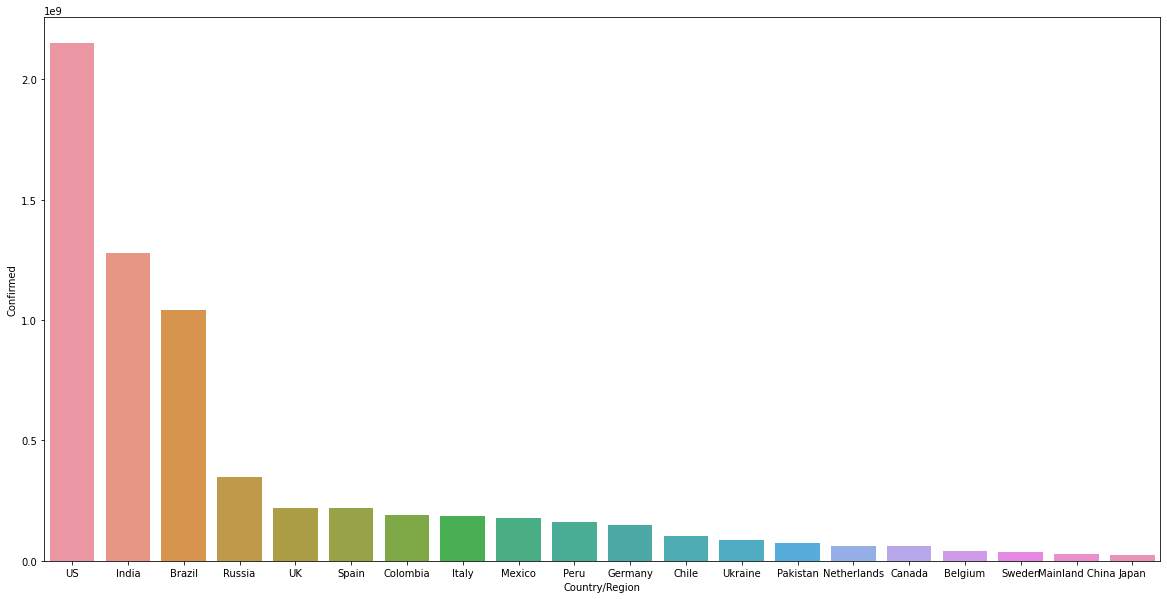

In [17]:
# Plotting graph of top 20 countries with highest confirmed cases.

plt.figure(figsize=(20,10))
sns.barplot(y='Confirmed',x='Country/Region',data=d1)
#d1

<AxesSubplot:xlabel='Country/Region', ylabel='Deaths'>

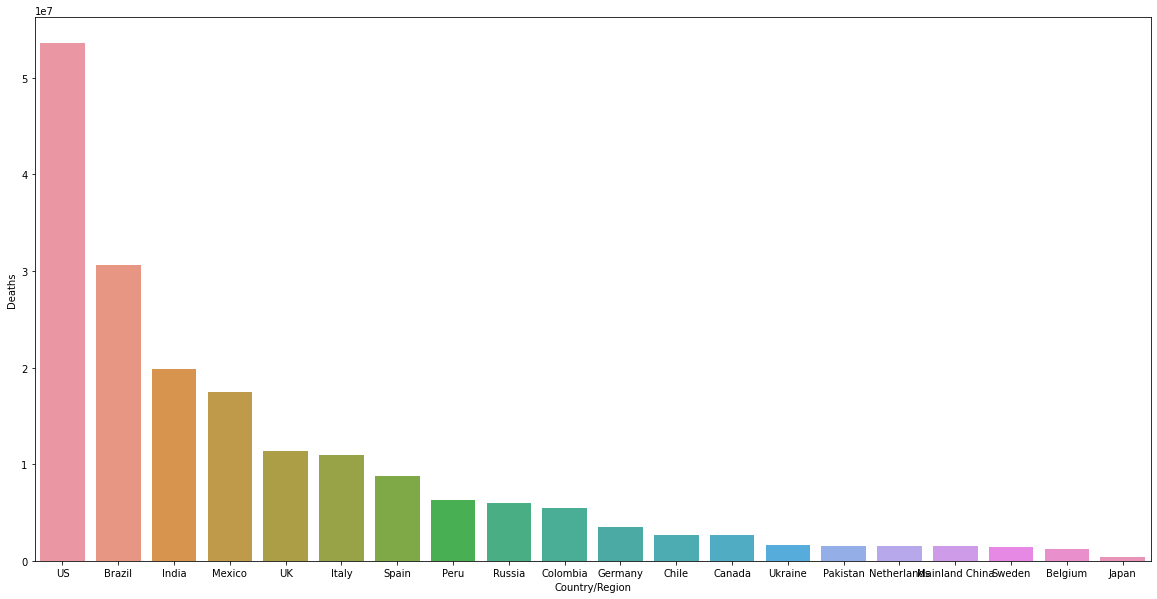

In [18]:
# Plotting graph of top 20 countries with highest death cases.

plt.figure(figsize=(20,10))
sns.barplot(y='Deaths',x='Country/Region',data=d2)


<AxesSubplot:xlabel='Country/Region', ylabel='Recovered'>

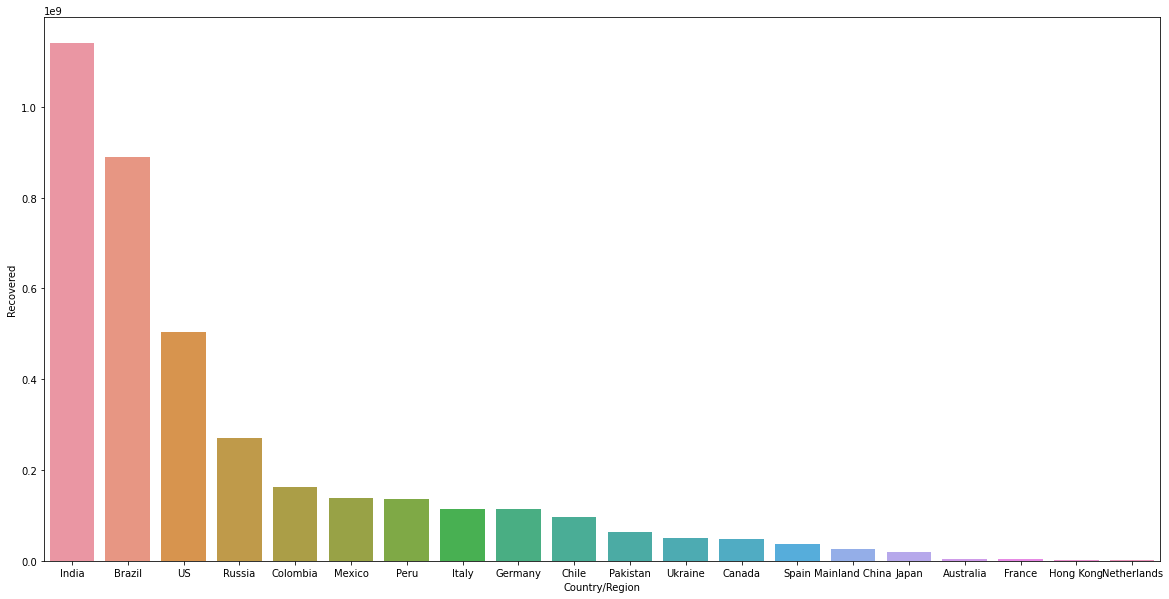

In [19]:
# Plotting graph of top 20 countries with highest recovered cases.

plt.figure(figsize=(20,10))
sns.barplot(y='Recovered',x='Country/Region',data=d3)

# Plotting graph for top 3 countries with highest death rate(per million) 

1. Making the country column in both dataset same by changing the names of some countries( eg- United states to US ) 

In [20]:
df2['Country (or dependency)'][0,2]= ["Mainland China","US"]
df2

<ipython-input-20-be07e2945e38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Country (or dependency)'][0,2]= ["Mainland China","US"]
c:\users\pc-lenovo\miniconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,Mainland China,1440297825,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1382345085,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,US,331341050,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,274021604,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,221612785,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %
...,...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,4993,0.06 %,3,50,100,NaN,N.A.,N.A.,10 %,0.00 %
231,Falkland Islands,3497,3.05 %,103,0,12170,NaN,N.A.,N.A.,66 %,0.00 %
232,Niue,1628,0.68 %,11,6,260,NaN,N.A.,N.A.,46 %,0.00 %
233,Tokelau,1360,1.27 %,17,136,10,NaN,N.A.,N.A.,0 %,0.00 %


2. Copying population of respective countries from 'population' dataset to 'covid 19' dataset in a new column

In [29]:
for i in range(30):
    for j in range(235):
        if(df2['Country (or dependency)'][j]==d['Country/Region'][i]):
            d['Population'][i] = df2['Population (2020)'][j]

<ipython-input-29-ea86b722c821>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Population'][i] = df2['Population (2020)'][j]


In [30]:
d[['Country/Region','Population']]

,Country/Region,Population
0,Australia,25550683
1,Austria,9015361
2,Belgium,11598451
3,Brazil,212821986
4,Canada,37799407
5,Chile,19144605
6,Colombia,50976248
7,Denmark,5795780
8,France,65298930
9,Germany,83830972


3. Calculating deaths per million population for respective countries in a new column and sorting on the basis of it. Here we can see that The US, the UK and Mexico have highest death per million population 

In [32]:
d['Deaths(Per million population)']=(np.array(d['Deaths'])/np.array(d['Population']))*1000000
d=d.sort_values('Deaths(Per million population)',ascending=False)
d

,Country/Region,SNo,Confirmed,Deaths,Recovered,Population,Deaths(Per million population)
28,UK,425722005,2.189906e+08,11413662.0,6.779190e+05,50976248,223901.570786
23,Peru,720756143,1.616212e+08,6296100.0,1.360963e+08,33050211,190501.053080
25,Spain,561589134,2.176408e+08,8771862.0,3.772392e+07,46757980,187601.389110
14,Italy,590494364,1.854673e+08,10931159.0,1.151558e+08,60446035,180841.621787
29,US,1686963479,2.150559e+09,53579012.0,5.033710e+08,331341050,161703.513646
3,Brazil,755495508,1.040627e+09,30644921.0,8.898000e+08,212821986,143993.210363
26,Sweden,577105010,3.780195e+07,1450370.0,0.000000e+00,10110233,143455.645384
5,Chile,475108993,1.030153e+08,2719818.0,9.553392e+07,19144605,142067.073204
19,Mexico,907156225,1.773531e+08,17475467.0,1.390975e+08,129166028,135294.607031
2,Belgium,148864960,4.217720e+07,1239451.0,0.000000e+00,11598451,106863.494099


Plotting graph for Uk comparing values of confirmed, recovered and death cases

<AxesSubplot:>

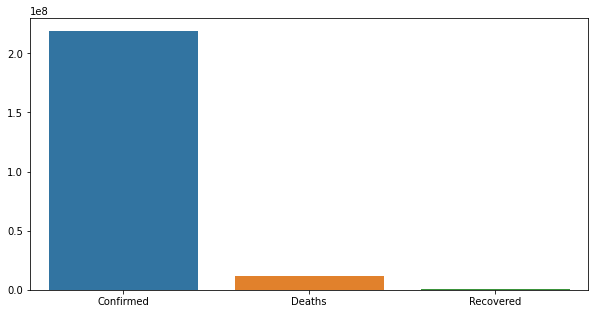

In [34]:
d4 = d[d['Country/Region'] == 'UK']
d4=d4.drop(['Population','Deaths(Per million population)','SNo'],axis =1)
plt.figure(figsize=(10,5))
sns.barplot(data=d4)

Plotting graph for Peru comparing values of confirmed, recovered and death cases

<AxesSubplot:>

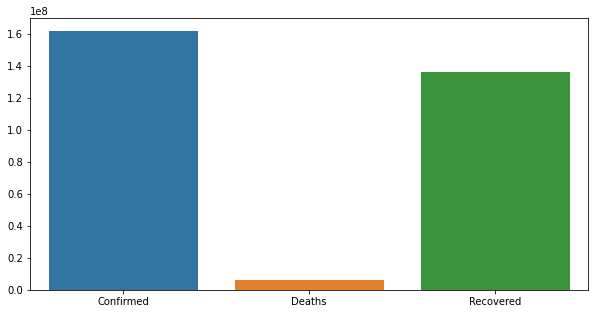

In [36]:
d5 = d[d['Country/Region'] == 'Peru']
d5=d5.drop(['Population','Deaths(Per million population)','SNo'],axis =1)
plt.figure(figsize=(10,5))
sns.barplot(data=d5)

Plotting graph for Spain comparing values of confirmed, recovered and death cases

<AxesSubplot:>

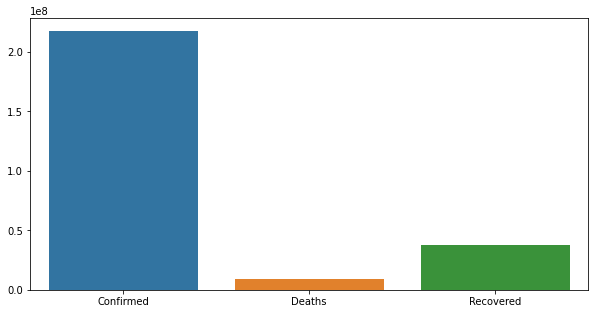

In [37]:
d6 = d[d['Country/Region'] == 'Spain']
d6=d6.drop(['Population','Deaths(Per million population)','SNo'],axis =1)
plt.figure(figsize=(10,5))
sns.barplot(data=d6)

# Plotting graph of top 10 countries with highest cases per million population

1. Calculating the cases per million population and sorting on the basis of it. 

In [38]:
d['Cases(per million population)']=(np.array(d['Confirmed'])/np.array(d['Population']))*1000000
d=d.sort_values('Cases(per million population)',ascending=False)
d

,Country/Region,SNo,Confirmed,Deaths,Recovered,Population,Deaths(Per million population),Cases(per million population)
29,US,1686963479,2.150559e+09,53579012.0,5.033710e+08,331341050,161703.513646,6.490471e+06
5,Chile,475108993,1.030153e+08,2719818.0,9.553392e+07,19144605,142067.073204,5.380906e+06
23,Peru,720756143,1.616212e+08,6296100.0,1.360963e+08,33050211,190501.053080,4.890170e+06
3,Brazil,755495508,1.040627e+09,30644921.0,8.898000e+08,212821986,143993.210363,4.889658e+06
25,Spain,561589134,2.176408e+08,8771862.0,3.772392e+07,46757980,187601.389110,4.654624e+06
28,UK,425722005,2.189906e+08,11413662.0,6.779190e+05,50976248,223901.570786,4.295935e+06
26,Sweden,577105010,3.780195e+07,1450370.0,0.000000e+00,10110233,143455.645384,3.738980e+06
20,Netherlands,445378725,6.352952e+07,1503841.0,9.169610e+05,17141544,87730.778511,3.706172e+06
6,Colombia,937807409,1.886471e+08,5445976.0,1.615978e+08,50976248,106833.598267,3.700687e+06
2,Belgium,148864960,4.217720e+07,1239451.0,0.000000e+00,11598451,106863.494099,3.636451e+06


2. Taking out the data of top 10 countries and plotting graph between them.

<AxesSubplot:xlabel='Country/Region', ylabel='Cases(per million population)'>

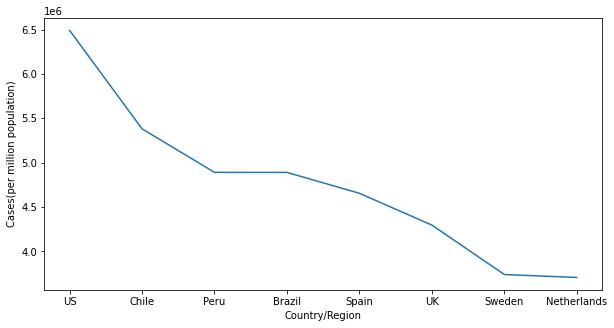

In [40]:
d_new= d.iloc[:8,[0,6,7]]
plt.figure(figsize=(10,5))
sns.lineplot(x='Country/Region', y='Cases(per million population)', data = d_new)